<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/07_bagging_scratch_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging scratch regression

In [8]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
# Generate a regression dataset
X, y = make_regression(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    noise=0.1,
    random_state=42
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Scratch implementation of Bagging Regressor
class ScratchBaggingRegressor:
    def __init__(self, base_estimator, n_estimators=10, random_state=None):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.models = []
        self.random_state = random_state
        if random_state is not None:
            np.random.seed(random_state)

    def fit(self, X, y):
        self.models = []
        n_samples = X.shape[0]
        for i in range(self.n_estimators):
            # Bootstrap sampling
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample, y_sample = X[indices], y[indices]
            model = self.base_estimator()  # Instantiate the base model
            model.fit(X_sample, y_sample)
            self.models.append(model)

    def predict(self, X):
        # Aggregate predictions from all models using averaging
        predictions = np.array([model.predict(X) for model in self.models])
        return np.mean(predictions, axis=0)



In [13]:
# Evaluate performance with a single decision tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Evaluate performance with scratch implementation of Bagging
scratch_bagging = ScratchBaggingRegressor(
    base_estimator=DecisionTreeRegressor, n_estimators=50, random_state=42
)
scratch_bagging.fit(X_train, y_train)
y_pred_bagging = scratch_bagging.predict(X_test)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)

# Display results
print("Decision Tree MSE:", mse_dt)
print("Scratch Bagging MSE:", mse_bagging)


Decision Tree MSE: 42008.518280213226
Scratch Bagging MSE: 17086.505736942006


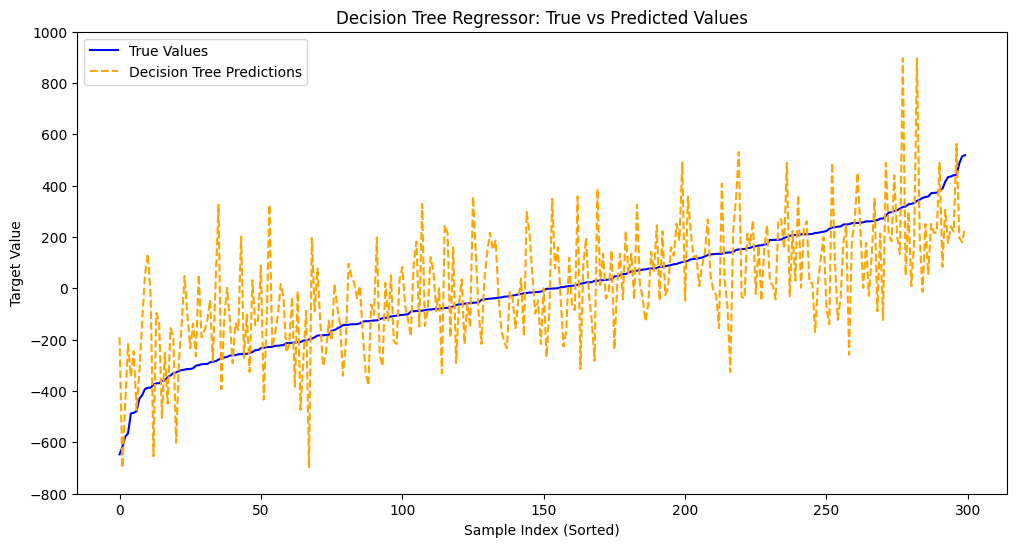

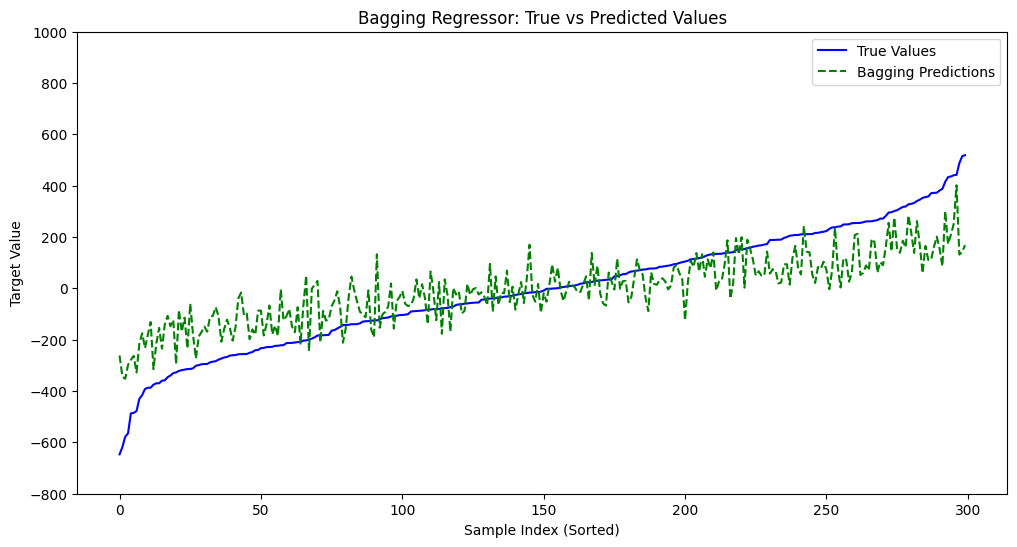

In [11]:
# Visualize predictions vs true values for both models

# Sorting for visualization purposes
sorted_indices = np.argsort(y_test)

# Plot for Decision Tree Regressor
plt.figure(figsize=(12, 6))
plt.plot(
    np.arange(len(y_test)),
    y_test[sorted_indices],
    label="True Values",
    color="blue"
)
plt.plot(
    np.arange(len(y_test)),
    y_pred_dt[sorted_indices],
    label="Decision Tree Predictions",
    color="orange",
    linestyle="--"
)
plt.title("Decision Tree Regressor: True vs Predicted Values")
plt.xlabel("Sample Index (Sorted)")
plt.ylabel("Target Value")
plt.ylim([-800,1000])
plt.legend()
plt.show()

# Plot for Bagging Regressor
plt.figure(figsize=(12, 6))
plt.plot(
    np.arange(len(y_test)),
    y_test[sorted_indices],
    label="True Values",
    color="blue"
)
plt.plot(
    np.arange(len(y_test)),
    y_pred_bagging[sorted_indices],
    label="Bagging Predictions",
    color="green",
    linestyle="--"
)
plt.title("Bagging Regressor: True vs Predicted Values")
plt.xlabel("Sample Index (Sorted)")
plt.ylabel("Target Value")
plt.ylim([-800,1000])
plt.legend()
plt.show()
